In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"c7_used_cars.csv")
df

,Unnamed: 0,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,VW
1,1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,VW
2,2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0,VW
3,3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,VW
4,4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,VW
...,...,...,...,...,...,...,...,...,...,...,...
99182,10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0,Audi
99183,10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0,Audi
99184,10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0,Audi
99185,10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,Audi


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99187 entries, 0 to 99186
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    99187 non-null  int64  
 1   model         99187 non-null  object 
 2   year          99187 non-null  int64  
 3   price         99187 non-null  int64  
 4   transmission  99187 non-null  object 
 5   mileage       99187 non-null  int64  
 6   fuelType      99187 non-null  object 
 7   tax           99187 non-null  int64  
 8   mpg           99187 non-null  float64
 9   engineSize    99187 non-null  float64
 10  Make          99187 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 8.3+ MB


In [5]:
df=df.dropna()

In [6]:
df.isnull().sum()

Unnamed: 0      0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,year,price,mileage,tax,mpg,engineSize
count,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000
mean,6294.413532,2017.087723,16805.347656,23058.914213,120.299838,55.166825,1.663280
std,4265.588536,2.123934,9866.773417,21148.523721,63.150926,16.138522,0.557646
min,0.000000,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2755.000000,2016.000000,9999.000000,7425.000000,125.000000,47.100000,1.200000
50%,5591.000000,2017.000000,14495.000000,17460.000000,145.000000,54.300000,1.600000
75%,9420.000000,2019.000000,20870.000000,32339.000000,145.000000,62.800000,2.000000
max,17964.000000,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [8]:
df.columns

Index(['Unnamed: 0', 'model', 'year', 'price', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize', 'Make'],
      dtype='object')

In [12]:
df['transmission'].value_counts()

Manual       56445
Semi-Auto    22677
Automatic    20056
Other            9
Name: transmission, dtype: int64

In [13]:
g1={"transmission":{'Other':0,'Manual':1,'Semi-Auto':2,'Automatic':3}}
df=df.replace(g1)
print(df)

       Unnamed: 0   model  year  price  transmission  mileage fuelType  tax  \
0               0   T-Roc  2019  25000             3    13904   Diesel  145   
1               1   T-Roc  2019  26883             3     4562   Diesel  145   
2               2   T-Roc  2019  20000             1     7414   Diesel  145   
3               3   T-Roc  2019  33492             3     4825   Petrol  145   
4               4   T-Roc  2019  22900             2     6500   Petrol  150   
...           ...     ...   ...    ...           ...      ...      ...  ...   
99182       10663      A3  2020  16999             1     4018   Petrol  145   
99183       10664      A3  2020  16999             1     1978   Petrol  150   
99184       10665      A3  2020  17199             1      609   Petrol  150   
99185       10666      Q3  2017  19499             3     8646   Petrol  150   
99186       10667      Q3  2016  15999             1    11855   Petrol  150   

        mpg  engineSize  Make  
0      49.6        

In [16]:
x=df[['Unnamed: 0','year','price','mileage','tax','mpg','engineSize']]
y=df["transmission"]

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70)

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [19]:
parameters={'max_depth':[1,2,3,4,5],
            'min_samples_leaf':[5,10,15,20,25],
            'n_estimators':[10,20,30,40,50]}

In [20]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring="accuracy")
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 15, 20, 25],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [21]:
grid_search.best_score_

0.7316289788275961

In [22]:
parameters={'max_depth':[1,2,3,4,5],
            'min_samples_leaf':[5,10,15,20,25],
            'n_estimators':[10,20,30,40,50]}

In [23]:
rfc_best=grid_search.best_estimator_

[Text(2332.622950819672, 1993.2, 'price <= 17522.5\ngini = 0.585\nsamples = 43793\nvalue = [5, 39360, 15914, 14151]\nclass = Manual'),
 Text(1170.8852459016393, 1630.8000000000002, 'engineSize <= 1.75\ngini = 0.382\nsamples = 27985\nvalue = [4, 34127, 4247, 6032]\nclass = Manual'),
 Text(585.4426229508197, 1268.4, 'mpg <= 75.35\ngini = 0.278\nsamples = 21692\nvalue = [2, 28959, 2403, 3019]\nclass = Manual'),
 Text(292.72131147540983, 906.0, 'year <= 2017.5\ngini = 0.262\nsamples = 20670\nvalue = [2, 27909, 2372, 2446]\nclass = Manual'),
 Text(146.36065573770492, 543.5999999999999, 'price <= 10572.5\ngini = 0.293\nsamples = 12886\nvalue = [0, 17004, 1735, 1685]\nclass = Manual'),
 Text(73.18032786885246, 181.19999999999982, 'gini = 0.168\nsamples = 8567\nvalue = [0, 12277, 431, 784]\nclass = Manual'),
 Text(219.54098360655738, 181.19999999999982, 'gini = 0.483\nsamples = 4319\nvalue = [0, 4727, 1304, 901]\nclass = Manual'),
 Text(439.08196721311475, 543.5999999999999, 'engineSize <= 1.4

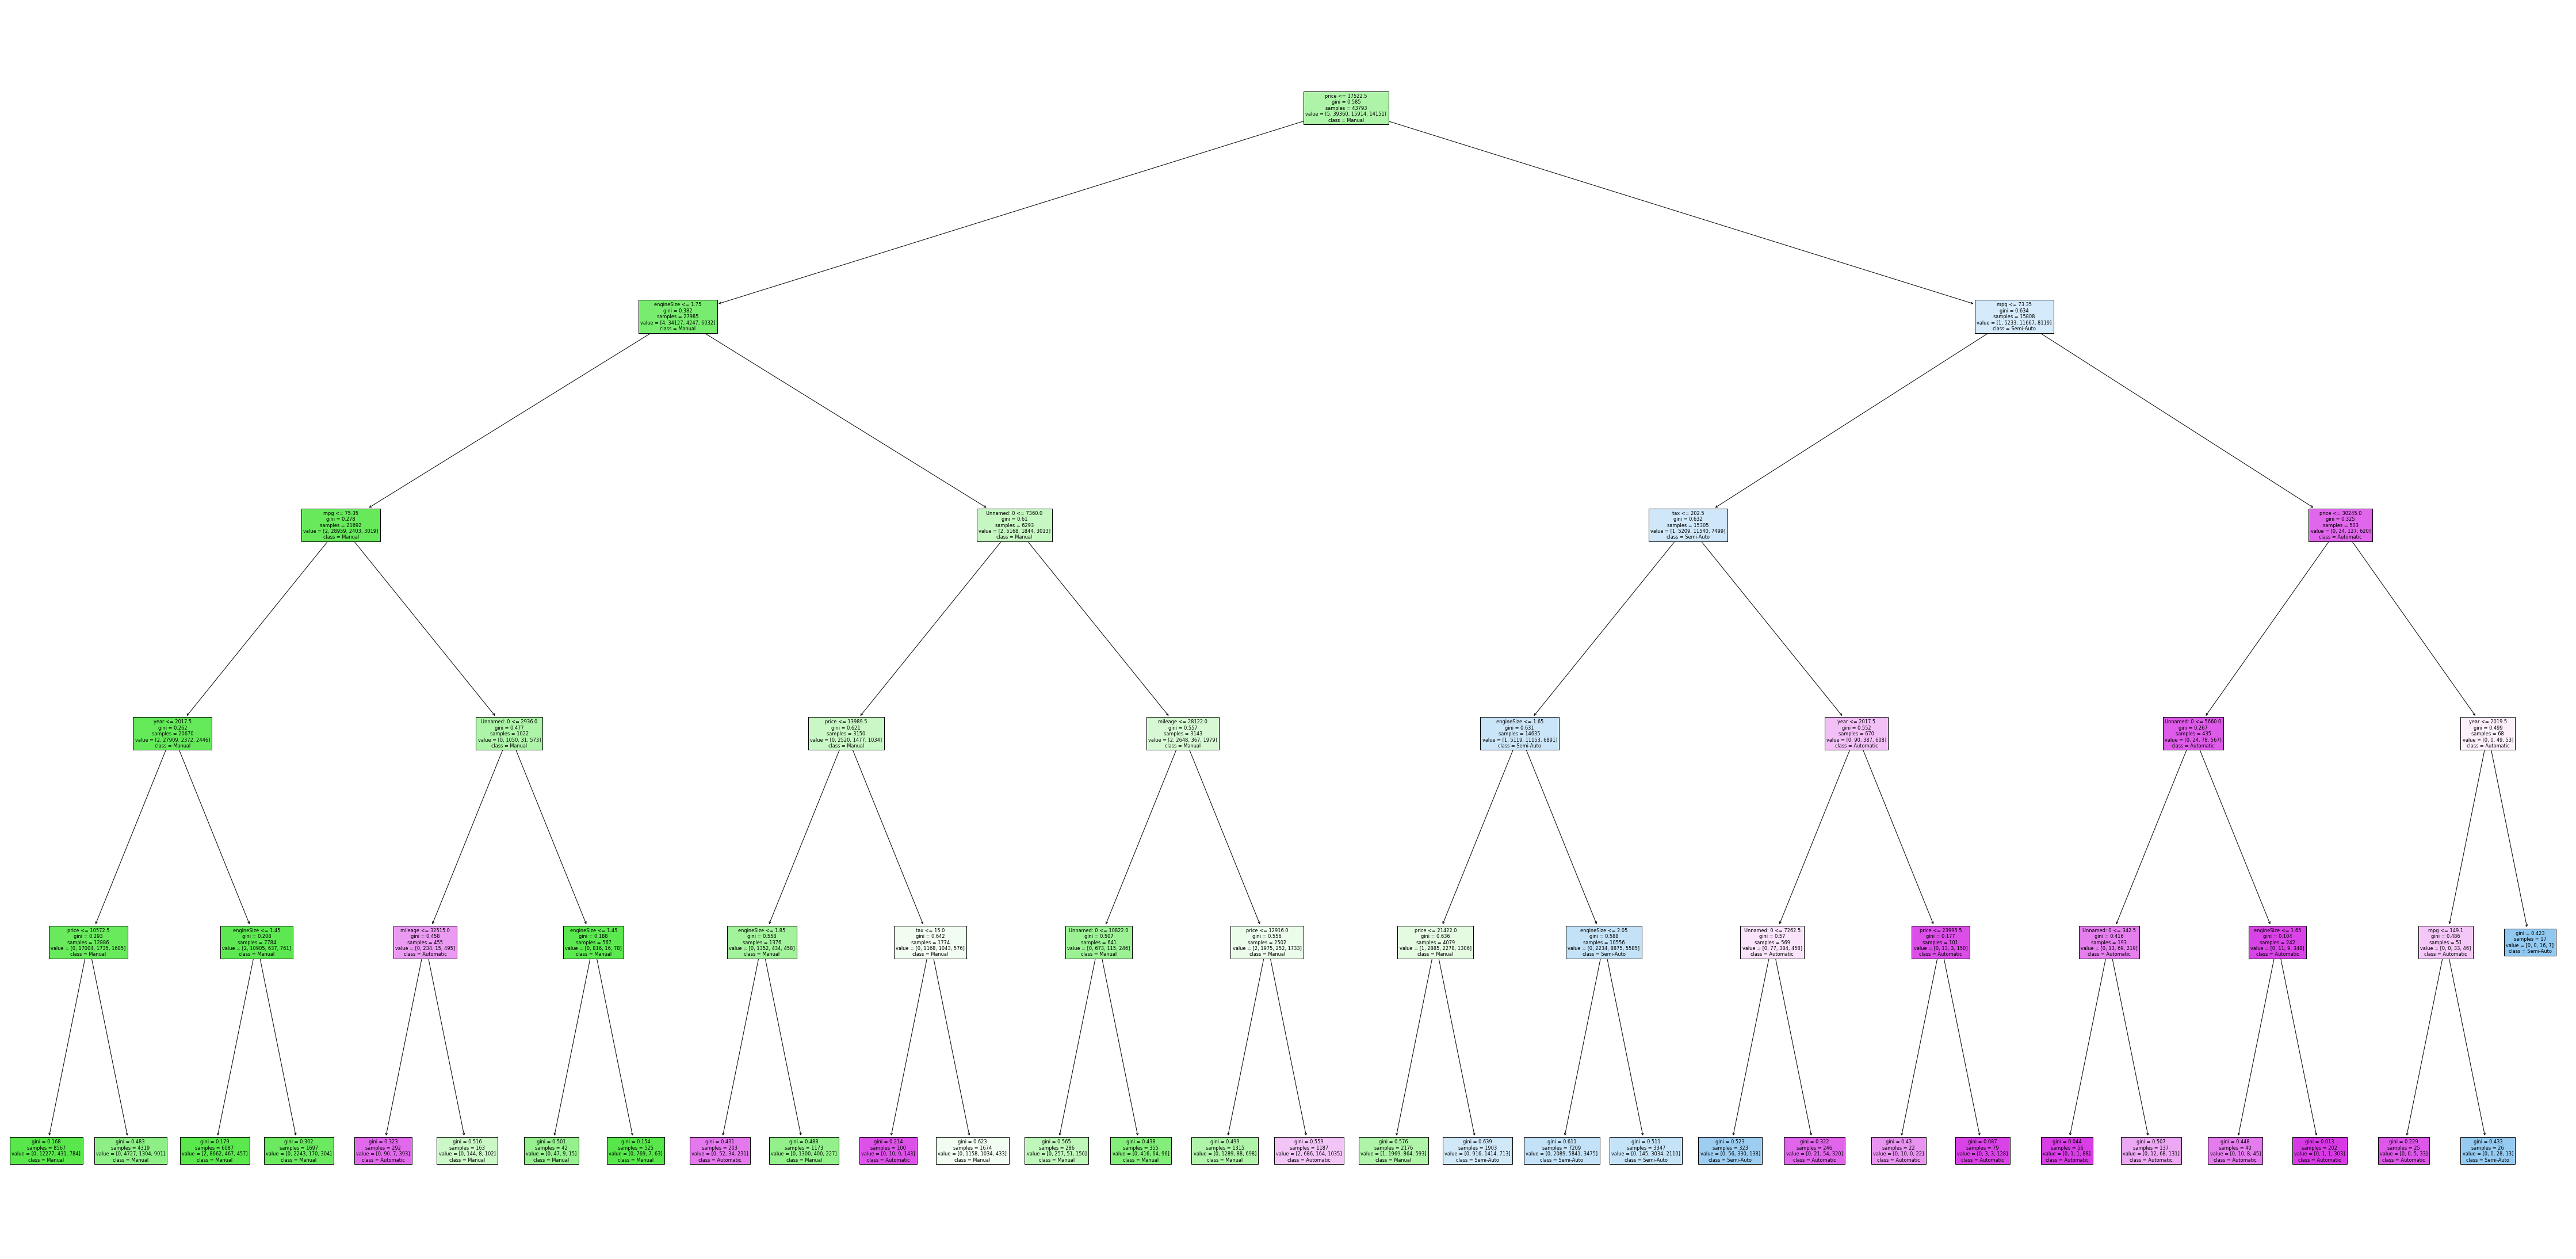

In [24]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rfc_best.estimators_[5],feature_names=x.columns,class_names=['Other','Manual','Semi-Auto','Automatic'],filled=True)